In [310]:
#

import re
from tqdm import tqdm
from ast import literal_eval
import os
import vcf
import gzip
from tqdm import tqdm
from collections import Counter
import pandas as pd
import os
import numpy as np
import itertools
import re
import matplotlib.pyplot as plt
import numpy as np
from pysam import VariantFile
import json
import pysam

In [6]:
# Analysing the Microsatellite Denovo parent of origin.


# 1. Question one is to see the distribution of number of mDNMs from each trio.
# 2. Question 2 is to check the distribution between counts of 'P' & 'M'.
#

In [374]:
# 

Number_mDNMs = [[],[]]
list_mDNMs = {}

In [372]:
#

def infile(infile):
    single_Dallele = 0
    final_info = {1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}
    
    with open(f'../denovo_phasing_aws/output/{infile}') as mDNMs :

        for Dregion in mDNMs:
            Dregion = Dregion.strip().split('\t')
            if len(Dregion) != 17: continue 
            Dallele_lens = Dregion[9].split('|')
            motif_size = len(Dregion[3])
            dregion = f'{Dregion[0]}:{Dregion[1]}-{Dregion[2]}'

            #
            mDNM_PofO = literal_eval(Dregion[12])

            #
            if len(mDNM_PofO) == 2:
                mDNM_PofO1, mDNM_PofO2 = mDNM_PofO[0], mDNM_PofO[1]
                PofO_Dallele_lens = [str(mDNM_PofO1[0]), str(mDNM_PofO2[0])]

                #
                if dregion not in list_mDNMs:
                    list_mDNMs[dregion] = ''
                else:
                    if Dallele_lens == PofO_Dallele_lens:
                        final_info[motif_size] += 1 


            #
            if len(mDNM_PofO) == 1:
                mDNM_PofO1, mDNM_PofO2 = mDNM_PofO[0],'.'
                if str(mDNM_PofO1[0]) in Dallele_lens:
                    single_Dallele += 1


    #
    return Number_mDNMs[0].append(sum(list(final_info.values())[0:])), Number_mDNMs[1].append(sum(list(final_info.values()))), infile


# infile('HG03137_DenovoAllele_Phasing.tsv')

In [373]:
# itterating the files.

read_directory = '../denovo_phasing_aws/output/'

for file in tqdm(os.listdir(read_directory)):
    
    # checking if the file has any info or not.
    if file.endswith('_DenovoAllele_Phasing.tsv') and os.stat(f'{read_directory}{file}').st_size != 0:
        print(infile(file), file, Number_mDNMs)
        break

    


  0%|                                                                                                                                                                                | 0/597 [00:00<?, ?it/s]

(None, None, 'HG00594_DenovoAllele_Phasing.tsv') HG00594_DenovoAllele_Phasing.tsv [[120, 120, 568, 568], [568, 568, 568, 568]]


# GRAPH

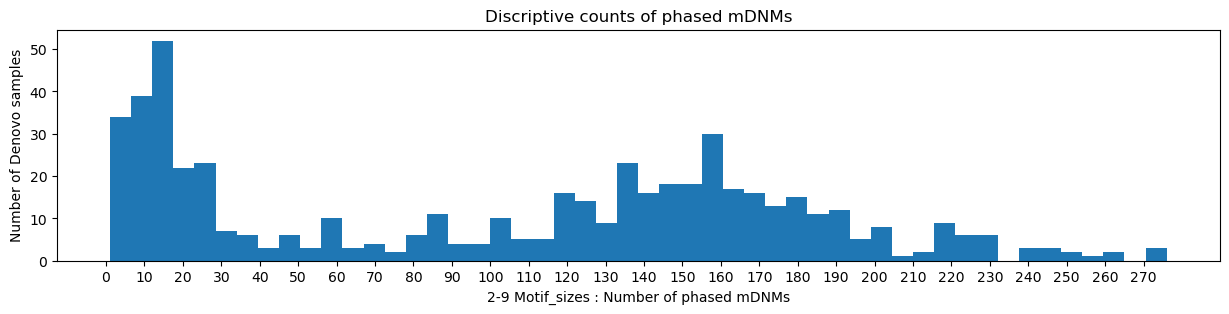

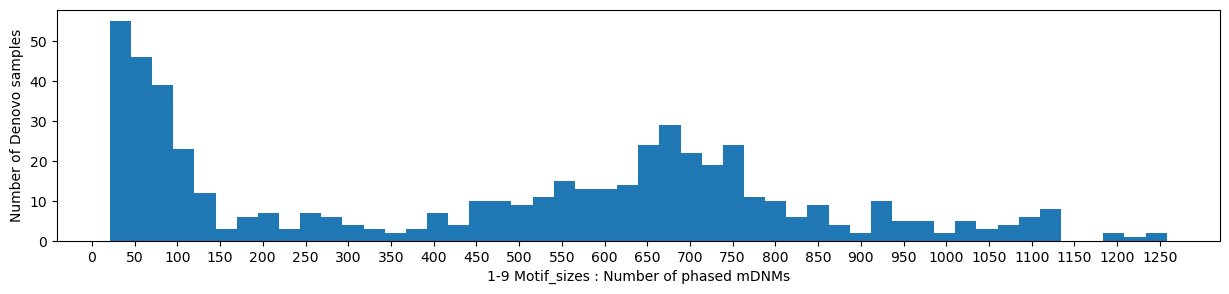

In [229]:
# Lets plot the 538 trios number of regions with and without homopolymers. sorry plotly
import matplotlib.pyplot as plt

#
n_bins = 50

plt.figure(figsize=(15, 3))
plt.hist(Number_mDNMs[0], bins = n_bins)
plt.xticks(np.arange(0,max(Number_mDNMs[0]), 10))

plt.xlabel('2-9 Motif_sizes : Number of phased mDNMs') 
plt.ylabel('Number of Denovo samples') 
plt.title('Discriptive counts of phased mDNMs')
plt.show()


#
plt.figure(figsize=(15, 3))
plt.hist(Number_mDNMs[1], bins=n_bins)
plt.xticks(np.arange(0,max(Number_mDNMs[1]), 50))

plt.xlabel('1-9 Motif_sizes : Number of phased mDNMs') 
plt.ylabel('Number of Denovo samples')

plt.show()

In [366]:
# Storing all the mDNMs to get the Union of all the regions.

mDNMs_info1 = {}

In [369]:
# Here we look into all the trio samples to get the Union of mDNMs regions.

def infile_union(infile):
    mDNMs_info = {}
    with open(f'../denovo_phasing_aws/output/{infile}') as denovo_regions:
    
        for dregion_info in denovo_regions:
            
            dregion_info = dregion_info.strip().split('\t')
            if len(dregion_info) != 17: continue
            dregion = f'{dregion_info[0]}:{dregion_info[1]}-{dregion_info[2]}'
            Dallele_lens = dregion_info[9].split('|')
            
            #
            mDNM_PofO = literal_eval(dregion_info[12])
            
            if len(mDNM_PofO) == 2:
                mDNM_PofO1, mDNM_PofO2 = mDNM_PofO[0], mDNM_PofO[1]
                PofO_Dallele_lens = [str(mDNM_PofO1[0]), str(mDNM_PofO2[0])]
                #
                if Dallele_lens == PofO_Dallele_lens:
                    if not dregion in mDNMs_info:
                         mDNMs_info[dregion] = 1
                    else:
                         mDNMs_info[dregion] += 1

            
            
            # adding the mDNMS_info dict with mDNMs.
        
        return len(mDNMs_info)

infile_union('HG00594_DenovoAllele_Phasing.tsv')

468

In [340]:
# # itterating the files.

# read_directory = '../denovo_phasing_aws/output/'

# for file in tqdm(os.listdir(read_directory)):
    
#     # checking if the file has any info or not.
#     if file.endswith('_DenovoAllele_Phasing.tsv') and os.stat(f'{read_directory}{file}').st_size != 0:
#         print(len(list(infile_union(file).keys())))
#         break


# Modifying the file structure.

In [314]:
#

# Read_directory = '../denovo_phasing_aws/output/'
Read_directory = '../../Analysis_KT/SNP_Denovo/SNPs_Intermediate_Files/SNPs_AssociatedDenovoSTR_lens/'

def infile(file):
    
    file_id = file.split('_')[0]
    out = open(f'../../Analysis_KT/SNP_Denovo/SNPs_Intermediate_Files/SNPs_AssociatedDenovoSTR_lens/{file_id}_modified.tsv', 'w')
    # print('Chromosome', 'Start', 'End', 'Actual_motif', 'Repeat_class', 'Repeat_start_position', 'Repeat_length', 'Off_spring_alleles', 'Denovo_allele', 'SNP_alleles','SNP_alleles_info', 'SNP_PofO','Denovo_alleles_info', 'Denovo_PofO', 'Phased_alleles', 'flag')#, file=out, sep='\t')
    with open(f'{Read_directory}{file}') as denovo_file:
        
        
        mDNMs = {}
        
        for info in tqdm(denovo_file):
            
            info = info.strip().split('\t')
            # if len(info) != 17: continue
            PofO_info = literal_eval(info[-5])
            Dalleles = info[7]
            
            # Checking if the same region is in next itteration.
            mDNM_region = f'{info[0]}:{info[1]}-{info[2]}'
            if len(PofO_info) == 2:
                Phased_alleles = f'{PofO_info[0][0]}/{PofO_info[1][0]}'
                if mDNM_region not in mDNMs:
                    mDNMs[mDNM_region] = [info[:9], info[10:12],'', Phased_alleles,1]
                    mDNMs[mDNM_region][2] = f'{PofO_info[0][0]}:{PofO_info[0][1]}:{PofO_info[0][2]},{PofO_info[1][0]}:{PofO_info[1][1]}:{PofO_info[1][2]}|{info[-4]}|{info[-3]}|{info[-2]}|{info[-1]}'

                else: 
                    mDNMs[mDNM_region][2] += f' ; {PofO_info[0][0]}:{PofO_info[0][1]}:{PofO_info[0][2]},{PofO_info[1][0]}:{PofO_info[1][1]}:{PofO_info[1][2]}|{info[-4]}|{info[-3]}|{info[-2]}|{info[-1]}'
                    mDNMs[mDNM_region][1].extend(info[10:12])
                    mDNMs[mDNM_region][-1] += 1
                    mDNMs[mDNM_region][-2] += f':{Phased_alleles}'
                    
                # print only when 
                if len(mDNMs) > 1:
                    keys = list(mDNMs.keys()) 
                    print(*mDNMs[keys[0]][0],f'SNP_Allele:PofO' , delimit_list(mDNMs[keys[0]][1]),f'Denovo_Allele:PofO|>5 DP|Total DP|Flank|Flank_postion', mDNMs[keys[0]][2], mDNMs[keys[0]][-2] ,mDNMs[keys[0]][-1], file=out, sep='\t')
                    mDNMs.pop(keys[0])
            
            elif len(PofO_info) == 1:
                Phased_alleles = f'{PofO_info[0][0]}'
                print(*info[:9],f'SNP_Allele:PofO', f'{info[10]}|{info[11]}', *info[10:12],f'Denovo_Allele:PofO|>5 DP|Total DP|Flank|Flank_postion',f'{PofO_info[0][0]}:{PofO_info[0][1]}:{PofO_info[0][2]}|{info[-4]}|{info[-3]}|{info[-2]}|{info[-1]}', f'{Phased_alleles}',0, file=out, sep='\t')
                    
    out.close()            
            
    
infile('HG01258_Phased_mDNMs.tsv')

67it [00:00, 43548.48it/s]


In [311]:
# Function add the delimit to the list of values.

def delimit_list(snp_info):
    
    # intializing the type delimits.
    snp_info_formatting = []
    delim = ","
    delim1 = '-'
    
    # changing the start and end corridinates to concatenate snp_alleles and its PofO with ',' & which seperates with "-". example :- snp_alleles,PofO - snp_alleles,PofO 
    s = 0
    e = 1
    
    # Runing the loop to only concatenate the snp_alleles and PofO
    for i in range(int(len(snp_info)/2) + 1):
        delimited_info = delim.join(map(str, snp_info[s:e+1]))
        snp_info_formatting.append(delimited_info)
        s = e+1
        e = e+2
    
    # Concatenating diffrent regions info column into one string
    snp_info_formatting.remove('')
    delimited_info1 = delim1.join(map(str, snp_info_formatting))
    
    return delimited_info1

In [293]:
# itterating the files.

# read_directory = '../denovo_phasing_aws/output/'

# for file in tqdm(os.listdir(read_directory)):
    
#     # checking if the file has any info or not.
#     if file.endswith('_DenovoAllele_Phasing.tsv.gz') and os.stat(f'{read_directory}{file}').st_size != 0:
#         infile(file)

In [230]:
# # check the number of phased Dalleles

# def phased_mDNMs(PofO_info, Dalleles):
    
#     #
#     Dallele_lens = Dalleles.split('|')
#     if len(PofO_info) == 2:
#         mDNM_PofO = PofO_info
#         mDNM_PofO1, mDNM_PofO2 = mDNM_PofO[0], mDNM_PofO[1]
#         PofO_Dallele_lens = [str(mDNM_PofO1[0]), str(mDNM_PofO2[0])]

#         #
#         check = len(set(Dallele_lens) - set(PofO_Dallele_lens))
#         if check == 0:
#             return 1
#         else:
#             return 0
